In [1]:
pip install tensorflow tensorflow-hub tensorflow-io matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 14.1 MB/s eta 0:00:00


Enter the path to the content image: /content/image1.jpeg
Enter the path to the style image: /content/th.jpeg


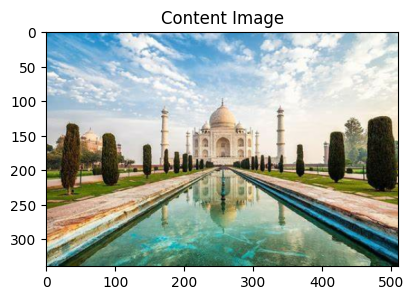

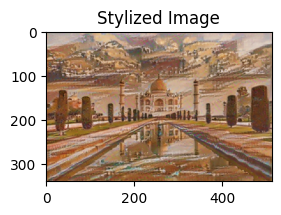

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image

# Function to load and preprocess images
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

# Function to display images
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.show()

# Function to display content, style, and stylized images together
def display_images(content_image, stylized_image):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 2)
    imshow(content_image, 'Content Image')

    plt.subplot(1, 2, 2)
    imshow(stylized_image, 'Stylized Image')

    plt.show()

# Get paths for content and style images from the user
content_path = input("Enter the path to the content image: ")
style_path = input("Enter the path to the style image: ")

# Load content and style images
content_image = load_img(content_path)
style_image = load_img(style_path)

# Load the style transfer model from TensorFlow Hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Apply style transfer
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

# Display the content and stylized images together
display_images(content_image, stylized_image)